In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [ ]:
data_path= "D:/MRI/Sample Dataset/BraTS20_Training_151"
test_image_T1= nib.load(data_path + "/BraTS20_Training_151_t1.nii").get_fdata()

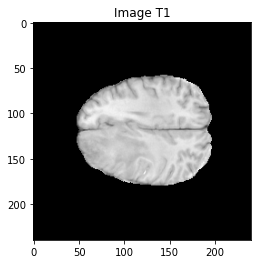

In [ ]:
n_slice = 104
plt.imshow(test_image_T1[:,:,n_slice], cmap='gray')
plt.title('Image T1')

plt.show()

In [ ]:
img = test_image_T1[:,:,n_slice]
img.shape

(240, 240)

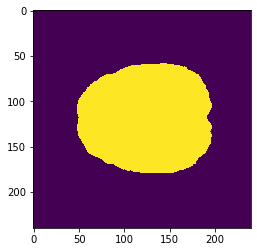

In [ ]:
image = np.where(img > 0, 1, 0)
plt.imshow(image, interpolation='nearest')
plt.show()

In [ ]:
structure = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])
import scipy.ndimage.measurements as mnts
bboxSlices = {}
for i in range(1, image.max() + 1):
    B = image.copy()
    B[B != i] = 0

    bboxSlices[i] = mnts.find_objects(mnts.label(B, structure=structure)[0])

print(bboxSlices)

{1: [(slice(58, 180, None), slice(48, 197, None))]}


In [ ]:
bboxes = []
for bboxslices in bboxSlices[1]:
    bbox = []
    for slice in bboxslices:
        bbox.append(slice.start)
        bbox.append(slice.stop)
    bboxes.append(bbox)

In [ ]:
bboxes

[[58, 180, 48, 197]]

In [ ]:
bboxes_np = np.array(bboxes, dtype=np.float32)

In [ ]:
bboxes_np 

array([[ 58., 180.,  48., 197.]], dtype=float32)

In [ ]:
ymin = np.min(bboxes_np[:,0])
ymax = np.max(bboxes_np[:,1])
xmin = np.min(bboxes_np[:,2])
xmax = np.max(bboxes_np[:,3])

In [ ]:
print('ymin=', ymin)
print('ymax=', ymax)
print('xmin=', xmin)
print('xmax=', xmax)

ymin= 58.0
ymax= 180.0
xmin= 48.0
xmax= 197.0


In [ ]:
crop = image[int(ymin):int(ymax), int(xmin):int(xmax)]

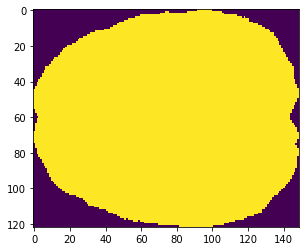

In [ ]:
plt.imshow(crop, interpolation='nearest')
plt.show()

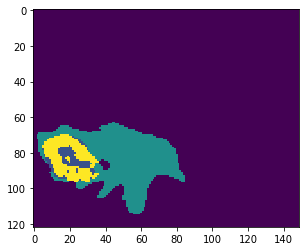

In [ ]:
test_mask= nib.load(data_path + "/BraTS20_Training_151_seg.nii").get_fdata()
seg_img = test_mask[:,:,n_slice]
crop_seg = seg_img[int(ymin):int(ymax), int(xmin):int(xmax)]
plt.imshow(crop_seg, interpolation='nearest')
plt.show()